## #01. 패키지 참조
---

In [2]:
import sys
import pandas as pd
import numpy as np
from pandas import read_excel, DataFrame, pivot_table, melt, crosstab
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer

## #02. 그래프 초기화
---

In [3]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams['axes.unicode_minus'] = False

## #03. 데이터 불러오기
---

In [4]:
origin = read_excel('#4.musinsadata_total_ratio.xlsx')
origin

,상품번호,종류,분류,성별,가격,조회수(18세이하),조회수(19~23세),조회수(24~28세),조회수(29~33세),조회수(34~39세),...,구매수(18세이하),구매수(19~23세),구매수(24~28세),구매수(29~33세),구매수(34~39세),구매수(40세이상),남구매수,여구매수,비로그인p,총 구매수
0,2037173,14.0,62.0,1.0,62.91,0.096711,0.141166,0.098753,0.062537,0.039557,...,0.127946,0.273917,0.207569,0.117231,0.079386,0.193951,0.667190,0.332533,0.000277,75782
1,1163169,9.0,108.0,0.0,139.00,0.084074,0.187129,0.203248,0.131198,0.085645,...,0.014599,0.126778,0.258236,0.245009,0.161093,0.194285,0.332543,0.666895,0.000562,16028
2,1178135,9.0,108.0,0.0,139.00,0.049513,0.198773,0.227587,0.137878,0.081970,...,0.006984,0.127436,0.291453,0.246691,0.147655,0.179781,0.267376,0.732424,0.000200,15035
3,452483,14.0,31.0,0.0,169.00,0.141457,0.331973,0.190931,0.100258,0.052136,...,0.043299,0.363755,0.274335,0.155290,0.063918,0.099403,0.792295,0.207596,0.000109,9215
4,2782764,14.0,4.0,1.0,263.20,0.024226,0.210644,0.305142,0.208786,0.086241,...,0.004380,0.185193,0.385610,0.288008,0.081543,0.055266,0.878624,0.121168,0.000209,4795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7678,2697817,6.0,26.0,0.0,69.90,0.017826,0.074348,0.105217,0.119565,0.157391,...,0.003650,0.113139,0.135036,0.204380,0.218978,0.324818,0.375912,0.624088,0.000000,274
7679,2757362,6.0,122.0,0.0,38.00,0.190138,0.207271,0.214375,0.153503,0.078005,...,0.126394,0.204461,0.245353,0.219331,0.074349,0.130112,0.754647,0.245353,0.000000,269
7680,3220337,3.0,102.0,0.0,55.00,0.144878,0.205659,0.151690,0.118418,0.076500,...,0.053616,0.242727,0.327099,0.201995,0.064007,0.110557,0.595594,0.403990,0.000416,2406
7681,3436582,3.0,93.0,1.0,66.75,0.010000,0.024762,0.090952,0.199048,0.182381,...,0.009615,0.009615,0.048077,0.317308,0.365385,0.250000,0.951923,0.048077,0.000000,104


## 이상치 예외처리를 하는 근거

1. **모델의 안정성 향상**: 이상치가 모델의 학습을 방해할 수 있습니다. 예를 들어, 회귀 모델은 이상치에 크게 영향을 받아 예측이 왜곡될 수 있습니다. 따라서 이상치를 예외로 처리함으로써 모델의 안정성이 향상됩니다.

2. **통계 분석 정확도 향상**: 이상치는 평균 및 표준 편차와 같은 통계적 측정을 왜곡시키는데, 이는 데이터의 일반적인 특성을 잘못 표현할 수 있습니다. 이를 제외하면 통계 분석 결과가 더 정확해질 수 있습니다.

3. **예측 성능 향상**: 머신러닝 모델은 일반적으로 정상적인 데이터에 적응되어 있습니다. 이상치가 예측에 영향을 미치면 모델이 불안정해질 수 있습니다. 따라서 이상치를 예외로 처리하여 예측 성능을 향상시킬 수 있습니다.

4. **데이터의 일반적인 특성 파악**: 이상치를 제외하면 데이터의 일반적인 특성을 더 잘 이해할 수 있습니다. 이는 데이터에 대한 더 나은 통찰력을 제공하고 모델 개선에 도움이 됩니다.

5. **이상치의 원인 이해**: 이상치를 식별하고 예외로 처리함으로써 데이터에 대한 이해를 높일 수 있습니다. 왜 특정 데이터가 이상치로 간주되었는지 이해하면 데이터 수집 및 전처리 과정에서의 오류나 특이한 상황을 식별할 수 있습니다.

## #04. 가격이상치정제

### [1] 가격이상치 (가격 극단치 이하)

#### (1) 이상치 확인

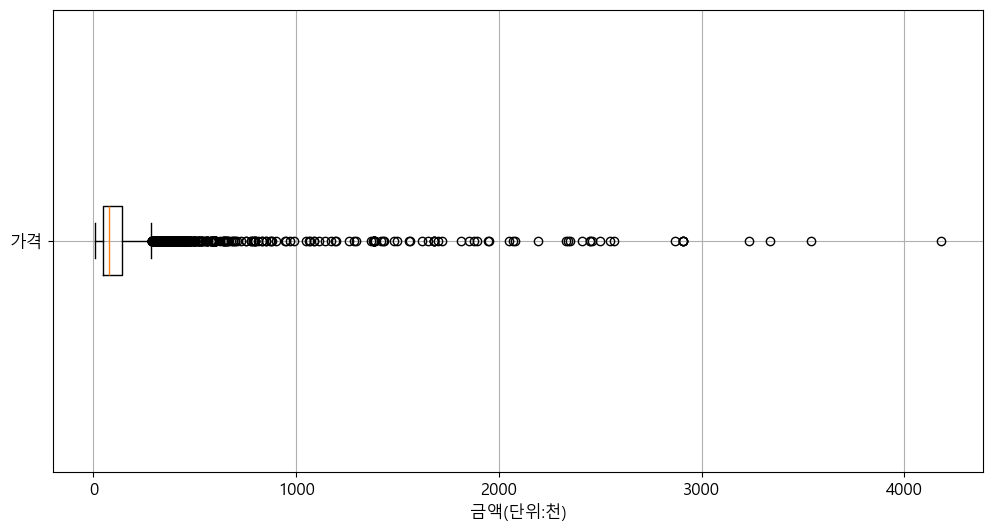

In [5]:
plt.figure()
plt.boxplot(origin['가격'],vert=0)
plt.xlabel('금액(단위:천)')
plt.yticks([1],['가격'])
plt.grid()
plt.show()
plt.close()

In [6]:
origin.sort_values(by='가격', ascending=False)

,상품번호,종류,분류,성별,가격,조회수(18세이하),조회수(19~23세),조회수(24~28세),조회수(29~33세),조회수(34~39세),...,구매수(18세이하),구매수(19~23세),구매수(24~28세),구매수(29~33세),구매수(34~39세),구매수(40세이상),남구매수,여구매수,비로그인p,총 구매수
5915,3183959,17.0,60.0,2.0,4179.000,0.019027,0.086165,0.187551,0.222615,0.214189,...,0.010025,0.107769,0.195489,0.245614,0.225564,0.215539,0.676692,0.323308,0.000000,399
7249,3318594,17.0,99.0,2.0,3538.000,0.074283,0.226484,0.190149,0.118288,0.068228,...,0.042636,0.307171,0.320736,0.174419,0.079457,0.075581,0.917151,0.082849,0.000000,2064
7647,2944063,17.0,60.0,2.0,3336.000,0.046718,0.184802,0.198403,0.148729,0.047014,...,0.014493,0.275362,0.456522,0.195652,0.021739,0.036232,0.942029,0.057971,0.000000,138
4361,3220481,17.0,60.0,2.0,3233.000,0.046538,0.258229,0.196935,0.160045,0.080023,...,0.020992,0.234733,0.356870,0.251908,0.083969,0.051527,0.904580,0.095420,0.000000,524
4197,3205602,0.0,60.0,0.0,2908.000,0.055367,0.256425,0.233749,0.139078,0.051020,...,0.018711,0.222869,0.362994,0.261538,0.073597,0.060291,0.396258,0.603742,0.000000,2405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3776,3711105,5.0,109.0,1.0,9.675,0.203272,0.190134,0.161874,0.116014,0.082920,...,0.134486,0.191162,0.249760,0.170029,0.121037,0.133525,0.826129,0.173871,0.000000,1041
2289,3649276,5.0,109.0,2.0,9.000,0.062066,0.149689,0.166225,0.098575,0.057126,...,0.057504,0.209891,0.267970,0.182864,0.128810,0.152961,0.096607,0.903393,0.000000,1739
2220,3545589,20.0,104.0,0.0,9.000,0.050877,0.186466,0.247291,0.141795,0.048611,...,0.007976,0.185111,0.375872,0.296444,0.100033,0.034563,0.320705,0.678963,0.000332,3009
4258,3006425,15.0,84.0,0.0,8.900,0.052999,0.266318,0.292698,0.155190,0.073775,...,0.023045,0.250953,0.380149,0.187806,0.065505,0.092542,0.474143,0.525494,0.000363,5511


#### (2) 이상치 정제

In [7]:
outline_price = origin.copy()

Q1 = origin['가격'].quantile(0.25)
Q2 = origin['가격'].quantile(0.5)
Q3 = origin['가격'].quantile(0.75)

# Q1,Q2,Q3

iqr = Q3 - Q1 # 사분위 범위
# print(iqr)

outline_max = Q3 + iqr * 1.5 # 상한 극단치 경계
outline_price.loc[outline_price['가격'] > outline_max, '가격'] = np.nan
outline_price

,상품번호,종류,분류,성별,가격,조회수(18세이하),조회수(19~23세),조회수(24~28세),조회수(29~33세),조회수(34~39세),...,구매수(18세이하),구매수(19~23세),구매수(24~28세),구매수(29~33세),구매수(34~39세),구매수(40세이상),남구매수,여구매수,비로그인p,총 구매수
0,2037173,14.0,62.0,1.0,62.91,0.096711,0.141166,0.098753,0.062537,0.039557,...,0.127946,0.273917,0.207569,0.117231,0.079386,0.193951,0.667190,0.332533,0.000277,75782
1,1163169,9.0,108.0,0.0,139.00,0.084074,0.187129,0.203248,0.131198,0.085645,...,0.014599,0.126778,0.258236,0.245009,0.161093,0.194285,0.332543,0.666895,0.000562,16028
2,1178135,9.0,108.0,0.0,139.00,0.049513,0.198773,0.227587,0.137878,0.081970,...,0.006984,0.127436,0.291453,0.246691,0.147655,0.179781,0.267376,0.732424,0.000200,15035
3,452483,14.0,31.0,0.0,169.00,0.141457,0.331973,0.190931,0.100258,0.052136,...,0.043299,0.363755,0.274335,0.155290,0.063918,0.099403,0.792295,0.207596,0.000109,9215
4,2782764,14.0,4.0,1.0,263.20,0.024226,0.210644,0.305142,0.208786,0.086241,...,0.004380,0.185193,0.385610,0.288008,0.081543,0.055266,0.878624,0.121168,0.000209,4795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7678,2697817,6.0,26.0,0.0,69.90,0.017826,0.074348,0.105217,0.119565,0.157391,...,0.003650,0.113139,0.135036,0.204380,0.218978,0.324818,0.375912,0.624088,0.000000,274
7679,2757362,6.0,122.0,0.0,38.00,0.190138,0.207271,0.214375,0.153503,0.078005,...,0.126394,0.204461,0.245353,0.219331,0.074349,0.130112,0.754647,0.245353,0.000000,269
7680,3220337,3.0,102.0,0.0,55.00,0.144878,0.205659,0.151690,0.118418,0.076500,...,0.053616,0.242727,0.327099,0.201995,0.064007,0.110557,0.595594,0.403990,0.000416,2406
7681,3436582,3.0,93.0,1.0,66.75,0.010000,0.024762,0.090952,0.199048,0.182381,...,0.009615,0.009615,0.048077,0.317308,0.365385,0.250000,0.951923,0.048077,0.000000,104


In [8]:
general_price = outline_price.dropna()
outline_buy

,상품번호,종류,분류,성별,가격,조회수(18세이하),조회수(19~23세),조회수(24~28세),조회수(29~33세),조회수(34~39세),...,구매수(18세이하),구매수(19~23세),구매수(24~28세),구매수(29~33세),구매수(34~39세),구매수(40세이상),남구매수,여구매수,비로그인p,총 구매수
0,2037173,14.0,62.0,1.0,62.91,0.096711,0.141166,0.098753,0.062537,0.039557,...,0.127946,0.273917,0.207569,0.117231,0.079386,0.193951,0.667190,0.332533,0.000277,75782
1,1163169,9.0,108.0,0.0,139.00,0.084074,0.187129,0.203248,0.131198,0.085645,...,0.014599,0.126778,0.258236,0.245009,0.161093,0.194285,0.332543,0.666895,0.000562,16028
2,1178135,9.0,108.0,0.0,139.00,0.049513,0.198773,0.227587,0.137878,0.081970,...,0.006984,0.127436,0.291453,0.246691,0.147655,0.179781,0.267376,0.732424,0.000200,15035
3,452483,14.0,31.0,0.0,169.00,0.141457,0.331973,0.190931,0.100258,0.052136,...,0.043299,0.363755,0.274335,0.155290,0.063918,0.099403,0.792295,0.207596,0.000109,9215
4,2782764,14.0,4.0,1.0,263.20,0.024226,0.210644,0.305142,0.208786,0.086241,...,0.004380,0.185193,0.385610,0.288008,0.081543,0.055266,0.878624,0.121168,0.000209,4795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7678,2697817,6.0,26.0,0.0,69.90,0.017826,0.074348,0.105217,0.119565,0.157391,...,0.003650,0.113139,0.135036,0.204380,0.218978,0.324818,0.375912,0.624088,0.000000,274
7679,2757362,6.0,122.0,0.0,38.00,0.190138,0.207271,0.214375,0.153503,0.078005,...,0.126394,0.204461,0.245353,0.219331,0.074349,0.130112,0.754647,0.245353,0.000000,269
7680,3220337,3.0,102.0,0.0,55.00,0.144878,0.205659,0.151690,0.118418,0.076500,...,0.053616,0.242727,0.327099,0.201995,0.064007,0.110557,0.595594,0.403990,0.000416,2406
7681,3436582,3.0,93.0,1.0,66.75,0.010000,0.024762,0.090952,0.199048,0.182381,...,0.009615,0.009615,0.048077,0.317308,0.365385,0.250000,0.951923,0.048077,0.000000,104


#### (3) 이상치 정제후

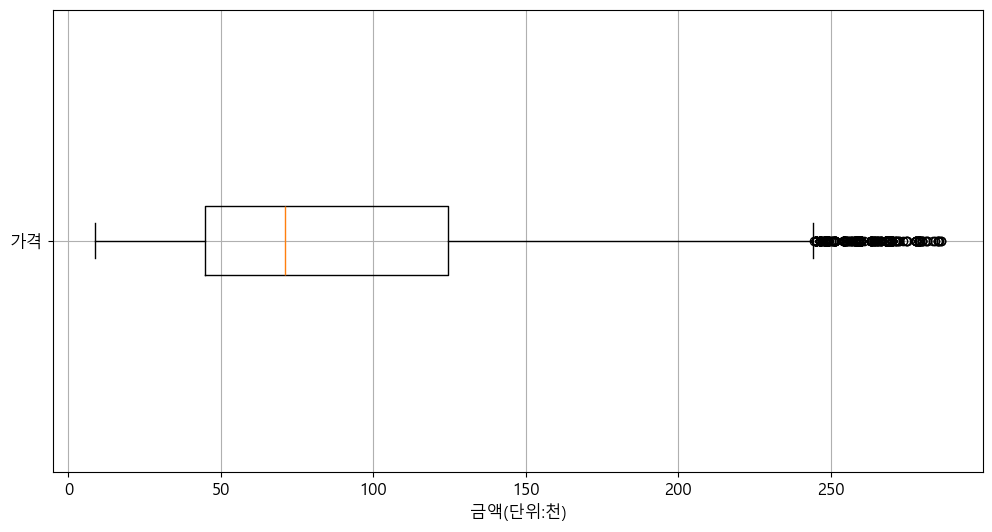

In [9]:
plt.figure()
plt.boxplot(general_price['가격'],vert=0)
plt.xlabel('금액(단위:천)')
plt.yticks([1],['가격'])
plt.grid()
plt.show()
plt.close()

### [2] 이상치정제(가격극단치 이상)

#### (1) 가격극단치 이상

In [10]:
outline_price = origin.copy()

Q1 = origin['가격'].quantile(0.25)
Q2 = origin['가격'].quantile(0.5)
Q3 = origin['가격'].quantile(0.75)

# Q1,Q2,Q3

iqr = Q3 - Q1 # 사분위 범위
# print(iqr)

outline_max = Q3 + iqr * 1.5 # 상한 극단치 경계
outline_price.loc[outline_price['가격'] < outline_max, '가격'] = np.nan
outline_price

,상품번호,종류,분류,성별,가격,조회수(18세이하),조회수(19~23세),조회수(24~28세),조회수(29~33세),조회수(34~39세),...,구매수(18세이하),구매수(19~23세),구매수(24~28세),구매수(29~33세),구매수(34~39세),구매수(40세이상),남구매수,여구매수,비로그인p,총 구매수
0,2037173,14.0,62.0,1.0,NaN,0.096711,0.141166,0.098753,0.062537,0.039557,...,0.127946,0.273917,0.207569,0.117231,0.079386,0.193951,0.667190,0.332533,0.000277,75782
1,1163169,9.0,108.0,0.0,NaN,0.084074,0.187129,0.203248,0.131198,0.085645,...,0.014599,0.126778,0.258236,0.245009,0.161093,0.194285,0.332543,0.666895,0.000562,16028
2,1178135,9.0,108.0,0.0,NaN,0.049513,0.198773,0.227587,0.137878,0.081970,...,0.006984,0.127436,0.291453,0.246691,0.147655,0.179781,0.267376,0.732424,0.000200,15035
3,452483,14.0,31.0,0.0,NaN,0.141457,0.331973,0.190931,0.100258,0.052136,...,0.043299,0.363755,0.274335,0.155290,0.063918,0.099403,0.792295,0.207596,0.000109,9215
4,2782764,14.0,4.0,1.0,NaN,0.024226,0.210644,0.305142,0.208786,0.086241,...,0.004380,0.185193,0.385610,0.288008,0.081543,0.055266,0.878624,0.121168,0.000209,4795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7678,2697817,6.0,26.0,0.0,NaN,0.017826,0.074348,0.105217,0.119565,0.157391,...,0.003650,0.113139,0.135036,0.204380,0.218978,0.324818,0.375912,0.624088,0.000000,274
7679,2757362,6.0,122.0,0.0,NaN,0.190138,0.207271,0.214375,0.153503,0.078005,...,0.126394,0.204461,0.245353,0.219331,0.074349,0.130112,0.754647,0.245353,0.000000,269
7680,3220337,3.0,102.0,0.0,NaN,0.144878,0.205659,0.151690,0.118418,0.076500,...,0.053616,0.242727,0.327099,0.201995,0.064007,0.110557,0.595594,0.403990,0.000416,2406
7681,3436582,3.0,93.0,1.0,NaN,0.010000,0.024762,0.090952,0.199048,0.182381,...,0.009615,0.009615,0.048077,0.317308,0.365385,0.250000,0.951923,0.048077,0.000000,104


In [11]:
outline_price = outline_price.dropna()
outline_price

,상품번호,종류,분류,성별,가격,조회수(18세이하),조회수(19~23세),조회수(24~28세),조회수(29~33세),조회수(34~39세),...,구매수(18세이하),구매수(19~23세),구매수(24~28세),구매수(29~33세),구매수(34~39세),구매수(40세이상),남구매수,여구매수,비로그인p,총 구매수
14,2482269,11.0,75.0,1.0,399.0,0.118028,0.163164,0.152022,0.134280,0.087441,...,0.048415,0.185698,0.229495,0.209906,0.088708,0.237777,0.598662,0.401338,0.000000,6279
21,3481221,14.0,4.0,1.0,319.5,0.016868,0.141075,0.328141,0.229851,0.095143,...,0.002170,0.100694,0.431424,0.326823,0.086806,0.052083,0.914062,0.085938,0.000000,2304
34,2737279,14.0,4.0,1.0,319.0,0.028156,0.204314,0.292814,0.195951,0.092501,...,0.005114,0.166899,0.412366,0.266388,0.087401,0.061832,0.880986,0.119014,0.000000,2151
43,3574916,14.0,25.0,1.0,349.0,0.052429,0.090681,0.200039,0.150825,0.085827,...,0.018764,0.082781,0.310155,0.236203,0.105960,0.246137,0.557395,0.441501,0.001104,906
166,668822,14.0,3.0,0.0,300.6,0.037869,0.191180,0.265195,0.199391,0.088240,...,0.004978,0.145465,0.353982,0.315265,0.108960,0.071350,0.905973,0.094027,0.000000,1808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7634,3477399,11.0,75.0,1.0,349.0,0.025332,0.054282,0.112183,0.080820,0.104544,...,0.011628,0.069767,0.151163,0.127907,0.220930,0.418605,0.686047,0.313953,0.000000,86
7635,2856924,9.0,108.0,2.0,656.0,0.013995,0.049618,0.081425,0.100509,0.047074,...,0.000000,0.161290,0.258065,0.193548,0.096774,0.290323,0.354839,0.645161,0.000000,31
7640,3397906,0.0,87.0,0.0,652.0,0.017337,0.123571,0.279970,0.190705,0.083733,...,0.000000,0.121212,0.181818,0.303030,0.060606,0.333333,0.424242,0.575758,0.000000,33
7645,2732152,13.0,47.0,0.0,289.0,0.001017,0.041709,0.111394,0.213123,0.149034,...,0.000000,0.011494,0.183908,0.298851,0.195402,0.310345,0.816092,0.183908,0.000000,87


#### (2) 이상치 정제후

<Axes: >

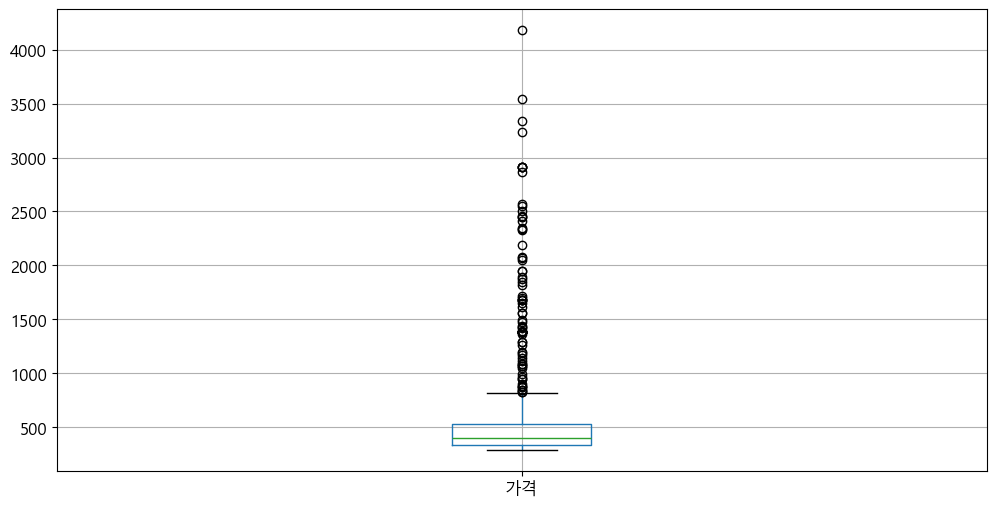

In [12]:
outline_price.boxplot(['가격'])

### [3] 정리

가격 이상치 확인 결과, 이상치에 포함된 상품들은 소위말하는 명품들로 구성되어있었다.

따라서, 데이터의 정확성을 올리기 위해 예외처리를 하였다.

## #05. 조회수 이상치 정제

### [1] 이상치 확인

가격을 정제한 데이터를 가지고와서 확인작업을 한다.

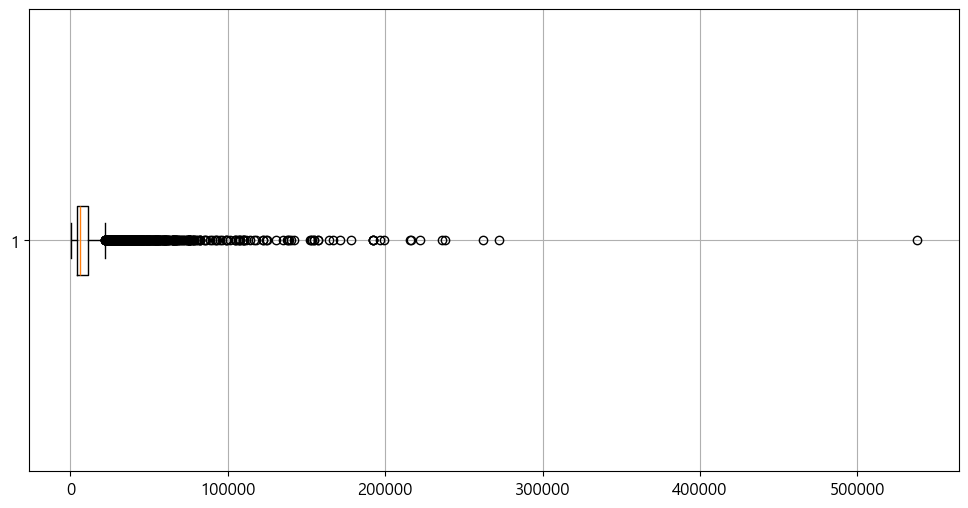

In [23]:
plt.figure()
plt.boxplot(general_price['총 조회수'],vert=0)
plt.grid()
plt.show()
plt.close()

### [2] 이상치 정제

In [26]:
outline_view = general_price.copy()

Q1 = general_price['총 조회수'].quantile(0.25)
Q2 = general_price['총 조회수'].quantile(0.5)
Q3 = general_price['총 조회수'].quantile(0.75)

# Q1,Q2,Q3

iqr = Q3 - Q1 # 사분위 범위
# print(iqr)

outline_max = Q3 + iqr * 1.5 # 상한 극단치 경계
outline_view.loc[outline_view['총 조회수'] > outline_max, '총 조회수'] = np.nan
outline_view

,상품번호,종류,분류,성별,가격,조회수(18세이하),조회수(19~23세),조회수(24~28세),조회수(29~33세),조회수(34~39세),...,구매수(18세이하),구매수(19~23세),구매수(24~28세),구매수(29~33세),구매수(34~39세),구매수(40세이상),남구매수,여구매수,비로그인p,총 구매수
0,2037173,14.0,62.0,1.0,62.91,0.096711,0.141166,0.098753,0.062537,0.039557,...,0.127946,0.273917,0.207569,0.117231,0.079386,0.193951,0.667190,0.332533,0.000277,75782
1,1163169,9.0,108.0,0.0,139.00,0.084074,0.187129,0.203248,0.131198,0.085645,...,0.014599,0.126778,0.258236,0.245009,0.161093,0.194285,0.332543,0.666895,0.000562,16028
2,1178135,9.0,108.0,0.0,139.00,0.049513,0.198773,0.227587,0.137878,0.081970,...,0.006984,0.127436,0.291453,0.246691,0.147655,0.179781,0.267376,0.732424,0.000200,15035
3,452483,14.0,31.0,0.0,169.00,0.141457,0.331973,0.190931,0.100258,0.052136,...,0.043299,0.363755,0.274335,0.155290,0.063918,0.099403,0.792295,0.207596,0.000109,9215
4,2782764,14.0,4.0,1.0,263.20,0.024226,0.210644,0.305142,0.208786,0.086241,...,0.004380,0.185193,0.385610,0.288008,0.081543,0.055266,0.878624,0.121168,0.000209,4795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7678,2697817,6.0,26.0,0.0,69.90,0.017826,0.074348,0.105217,0.119565,0.157391,...,0.003650,0.113139,0.135036,0.204380,0.218978,0.324818,0.375912,0.624088,0.000000,274
7679,2757362,6.0,122.0,0.0,38.00,0.190138,0.207271,0.214375,0.153503,0.078005,...,0.126394,0.204461,0.245353,0.219331,0.074349,0.130112,0.754647,0.245353,0.000000,269
7680,3220337,3.0,102.0,0.0,55.00,0.144878,0.205659,0.151690,0.118418,0.076500,...,0.053616,0.242727,0.327099,0.201995,0.064007,0.110557,0.595594,0.403990,0.000416,2406
7681,3436582,3.0,93.0,1.0,66.75,0.010000,0.024762,0.090952,0.199048,0.182381,...,0.009615,0.009615,0.048077,0.317308,0.365385,0.250000,0.951923,0.048077,0.000000,104


In [27]:
outline_view = outline_view.dropna()
outline_view

,상품번호,종류,분류,성별,가격,조회수(18세이하),조회수(19~23세),조회수(24~28세),조회수(29~33세),조회수(34~39세),...,구매수(18세이하),구매수(19~23세),구매수(24~28세),구매수(29~33세),구매수(34~39세),구매수(40세이상),남구매수,여구매수,비로그인p,총 구매수
59,2208663,3.0,20.0,0.0,34.80,0.072003,0.156120,0.248328,0.217463,0.126369,...,0.047349,0.230065,0.307916,0.222222,0.090051,0.102397,0.886710,0.112999,0.000290,6885
60,2208663,3.0,20.0,0.0,34.80,0.072003,0.156120,0.248328,0.217463,0.126369,...,0.047349,0.230065,0.307916,0.222222,0.090051,0.102397,0.886710,0.112999,0.000290,6885
61,2208663,3.0,20.0,1.0,34.80,0.072003,0.156120,0.248328,0.217463,0.126369,...,0.047349,0.230065,0.307916,0.222222,0.090051,0.102397,0.886710,0.112999,0.000290,6885
62,2208663,3.0,20.0,1.0,34.80,0.072003,0.156120,0.248328,0.217463,0.126369,...,0.047349,0.230065,0.307916,0.222222,0.090051,0.102397,0.886710,0.112999,0.000290,6885
63,1762406,9.0,10.0,0.0,260.00,0.012536,0.096640,0.223276,0.235356,0.167069,...,0.001223,0.041494,0.220549,0.349078,0.230805,0.156850,0.641607,0.358299,0.000094,10628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7677,3666394,3.0,102.0,2.0,89.00,0.126026,0.267585,0.209955,0.107493,0.039449,...,0.100000,0.183333,0.300000,0.216667,0.016667,0.183333,0.066667,0.933333,0.000000,60
7678,2697817,6.0,26.0,0.0,69.90,0.017826,0.074348,0.105217,0.119565,0.157391,...,0.003650,0.113139,0.135036,0.204380,0.218978,0.324818,0.375912,0.624088,0.000000,274
7679,2757362,6.0,122.0,0.0,38.00,0.190138,0.207271,0.214375,0.153503,0.078005,...,0.126394,0.204461,0.245353,0.219331,0.074349,0.130112,0.754647,0.245353,0.000000,269
7680,3220337,3.0,102.0,0.0,55.00,0.144878,0.205659,0.151690,0.118418,0.076500,...,0.053616,0.242727,0.327099,0.201995,0.064007,0.110557,0.595594,0.403990,0.000416,2406


### [3] 이상치 정제후

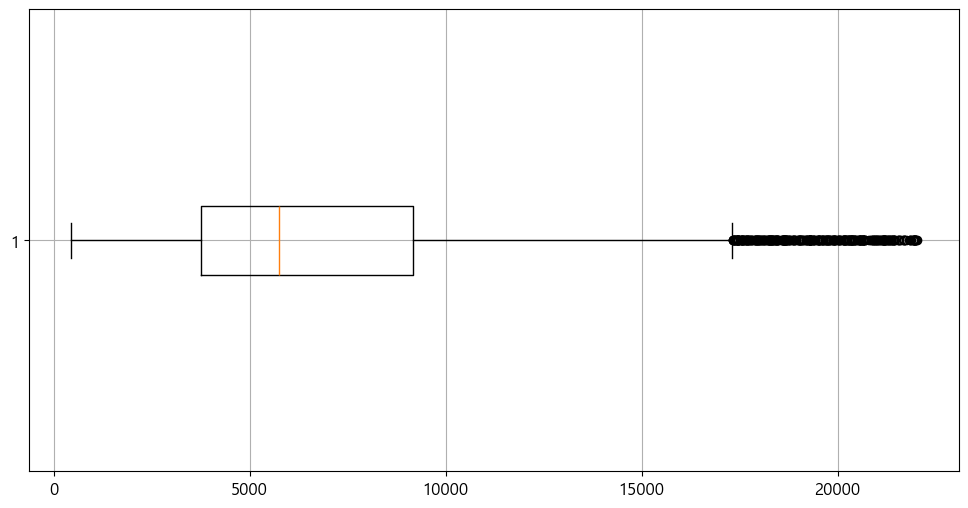

In [39]:
plt.figure()
plt.boxplot(outline_view['총 조회수'],vert=0)
plt.grid()
plt.show()
plt.close()

### [4] 정리

이상치 확인결과, 조회수가 높은 아이템들은 특수한 이벤트(할인행사,인플루언서 협찬 등)를 통해서 노출도를 올렸다고 판단했다.

## #06. 구매수 이상치 정제

### [1] 이상치 확인

가격과 조회수를 정제한 데이터를 가져온다.

```outline_view```

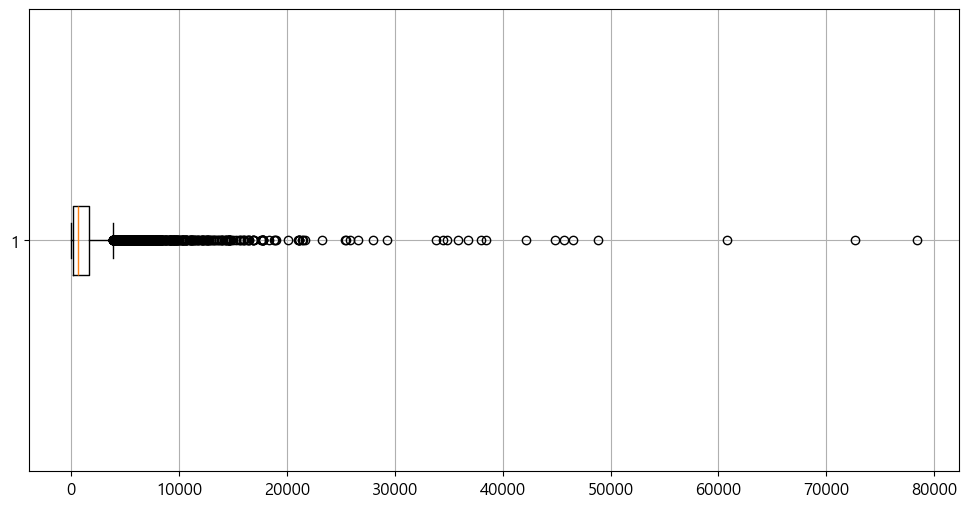

In [40]:
plt.figure()
plt.boxplot(outline_view['총 구매수'],vert=0)
plt.grid()
plt.show()
plt.close()

### [2] 이상치 정제

In [41]:
outline_buy = outline_view.copy()

Q1 = outline_buy['총 구매수'].quantile(0.25)
Q2 = outline_buy['총 구매수'].quantile(0.5)
Q3 = outline_buy['총 구매수'].quantile(0.75)

# Q1,Q2,Q3

iqr = Q3 - Q1 # 사분위 범위
# print(iqr)

outline_max = Q3 + iqr * 1.5 # 상한 극단치 경계
outline_buy.loc[outline_buy['총 구매수'] > outline_max, '총 구매수'] = np.nan
outline_buy

,상품번호,종류,분류,성별,가격,조회수(18세이하),조회수(19~23세),조회수(24~28세),조회수(29~33세),조회수(34~39세),...,구매수(18세이하),구매수(19~23세),구매수(24~28세),구매수(29~33세),구매수(34~39세),구매수(40세이상),남구매수,여구매수,비로그인p,총 구매수
59,2208663,3.0,20.0,0.0,34.80,0.072003,0.156120,0.248328,0.217463,0.126369,...,0.047349,0.230065,0.307916,0.222222,0.090051,0.102397,0.886710,0.112999,0.000290,NaN
60,2208663,3.0,20.0,0.0,34.80,0.072003,0.156120,0.248328,0.217463,0.126369,...,0.047349,0.230065,0.307916,0.222222,0.090051,0.102397,0.886710,0.112999,0.000290,NaN
61,2208663,3.0,20.0,1.0,34.80,0.072003,0.156120,0.248328,0.217463,0.126369,...,0.047349,0.230065,0.307916,0.222222,0.090051,0.102397,0.886710,0.112999,0.000290,NaN
62,2208663,3.0,20.0,1.0,34.80,0.072003,0.156120,0.248328,0.217463,0.126369,...,0.047349,0.230065,0.307916,0.222222,0.090051,0.102397,0.886710,0.112999,0.000290,NaN
63,1762406,9.0,10.0,0.0,260.00,0.012536,0.096640,0.223276,0.235356,0.167069,...,0.001223,0.041494,0.220549,0.349078,0.230805,0.156850,0.641607,0.358299,0.000094,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7677,3666394,3.0,102.0,2.0,89.00,0.126026,0.267585,0.209955,0.107493,0.039449,...,0.100000,0.183333,0.300000,0.216667,0.016667,0.183333,0.066667,0.933333,0.000000,60.0
7678,2697817,6.0,26.0,0.0,69.90,0.017826,0.074348,0.105217,0.119565,0.157391,...,0.003650,0.113139,0.135036,0.204380,0.218978,0.324818,0.375912,0.624088,0.000000,274.0
7679,2757362,6.0,122.0,0.0,38.00,0.190138,0.207271,0.214375,0.153503,0.078005,...,0.126394,0.204461,0.245353,0.219331,0.074349,0.130112,0.754647,0.245353,0.000000,269.0
7680,3220337,3.0,102.0,0.0,55.00,0.144878,0.205659,0.151690,0.118418,0.076500,...,0.053616,0.242727,0.327099,0.201995,0.064007,0.110557,0.595594,0.403990,0.000416,2406.0


In [42]:
outline_buy = outline_buy.dropna()
outline_buy

,상품번호,종류,분류,성별,가격,조회수(18세이하),조회수(19~23세),조회수(24~28세),조회수(29~33세),조회수(34~39세),...,구매수(18세이하),구매수(19~23세),구매수(24~28세),구매수(29~33세),구매수(34~39세),구매수(40세이상),남구매수,여구매수,비로그인p,총 구매수
117,2685576,14.0,62.0,0.0,249.00,0.026974,0.079704,0.160157,0.159408,0.108270,...,0.014427,0.075744,0.240757,0.204689,0.146078,0.318305,0.472498,0.527502,0.000000,1109.0
127,451851,13.0,47.0,1.0,268.00,0.047771,0.224164,0.247616,0.175617,0.083816,...,0.018192,0.183059,0.325753,0.255259,0.135304,0.082433,0.905060,0.094940,0.000000,1759.0
144,3276429,13.0,5.0,1.0,259.00,0.009420,0.153448,0.296722,0.230266,0.099708,...,0.001676,0.075021,0.347443,0.377619,0.131182,0.067058,0.968986,0.031014,0.000000,2386.0
150,595038,13.0,5.0,0.0,146.00,0.038588,0.215989,0.220726,0.159463,0.102033,...,0.006934,0.179792,0.299158,0.234274,0.149579,0.130263,0.641407,0.358593,0.000000,2019.0
171,1231944,9.0,108.0,0.0,139.00,0.072955,0.291003,0.226094,0.098070,0.056755,...,0.022356,0.302617,0.338877,0.145038,0.074700,0.116412,0.435115,0.564885,0.000000,3668.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7677,3666394,3.0,102.0,2.0,89.00,0.126026,0.267585,0.209955,0.107493,0.039449,...,0.100000,0.183333,0.300000,0.216667,0.016667,0.183333,0.066667,0.933333,0.000000,60.0
7678,2697817,6.0,26.0,0.0,69.90,0.017826,0.074348,0.105217,0.119565,0.157391,...,0.003650,0.113139,0.135036,0.204380,0.218978,0.324818,0.375912,0.624088,0.000000,274.0
7679,2757362,6.0,122.0,0.0,38.00,0.190138,0.207271,0.214375,0.153503,0.078005,...,0.126394,0.204461,0.245353,0.219331,0.074349,0.130112,0.754647,0.245353,0.000000,269.0
7680,3220337,3.0,102.0,0.0,55.00,0.144878,0.205659,0.151690,0.118418,0.076500,...,0.053616,0.242727,0.327099,0.201995,0.064007,0.110557,0.595594,0.403990,0.000416,2406.0


### [3] 이상치 정제후

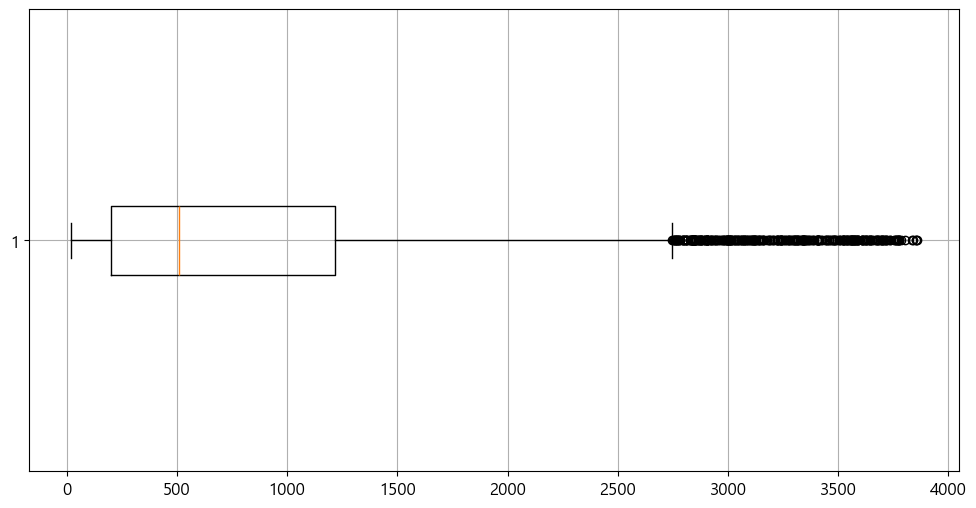

In [44]:
plt.figure()
plt.boxplot(outline_buy['총 구매수'],vert=0)
plt.grid()
plt.show()
plt.close()

#### [4] 정리

이상치 확인결과, 할인이벤트를 통한 구매가격 인하와 양말과 같은 저렴한 생활 필수품이 차지하고있어서 예외처리를 하였다. 

## #07. 가격, 조회수, 구매수

```outline_buy```는 가격, 조회수, 구매수의 이상치를 다 정제한 데이터이다.

### [1] 가격과 조회수의 산점도와 추세선

#### (1) 추세선 추출

In [50]:
z = np.polyfit(outline_buy['가격'], outline_buy['총 조회수'], 1)
f = np.poly1d(z)
f

poly1d([  -8.83884573, 7496.96225953])

In [51]:
x = outline_buy['가격']
y = f(x)
y

array([5296.08967211, 5128.15160319, 5207.70121479, ..., 7161.08612169,
       7010.82574424, 6906.96930688])

#### (2) 산점도 완성

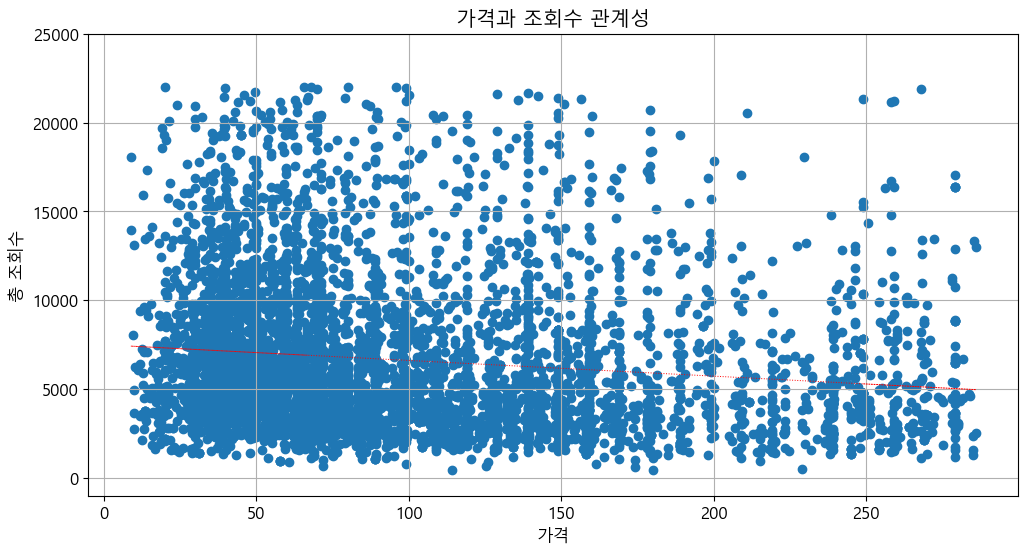

In [52]:
plt.figure()
plt.scatter(outline_buy['가격'], outline_buy['총 조회수'])
plt.plot(x, y, color="#ff0000", linewidth=0.7, linestyle=":")
plt.title("가격과 조회수 관계성")
plt.xlabel("가격")
plt.ylabel("총 조회수")
plt.ylim(-1000,25000)
plt.grid()
plt.show()
plt.close()

#### (3) 정리

가격이 25000~75000원, 조회수는 2500~7500회 사이에 많은 상품이 몰려있고, 가격이 올라갈수록 조회수도 낮아진다.

### [2] 가격과 구매수의 산점도와 추세선

#### (1) 추세선 추출

In [69]:
z = np.polyfit(outline_buy['가격'], outline_buy['총 구매수'], 1)
f = np.poly1d(z)
f

poly1d([  -5.83156203, 1427.101694  ])

In [70]:
x = outline_buy['가격']
y = f(x)
y

array([ -24.9572509 , -135.75692943,  -83.27287118, ..., 1205.50233695,
       1106.36578248, 1037.84492865])

#### (2) 산점도 완성

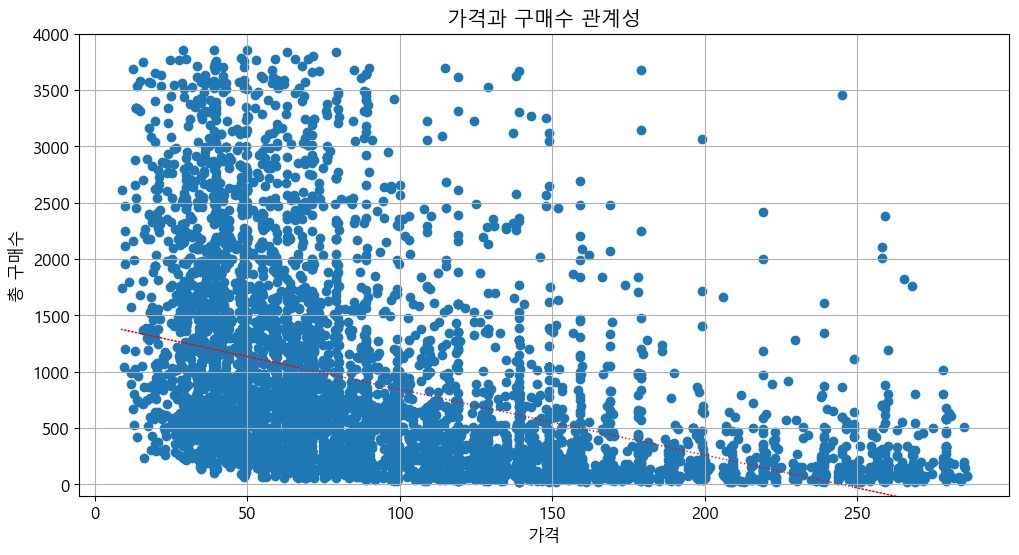

In [60]:
plt.figure()
plt.scatter(outline_buy['가격'], outline_buy['총 구매수'])
plt.plot(x, y, color="#ff0000", linewidth=1, linestyle=":")
plt.title("가격과 구매수 관계성")
plt.xlabel("가격")
plt.ylabel("총 구매수")
plt.ylim(-100,4000)
plt.grid()
plt.show()
plt.close()

#### (3) 정리

가격은 25000~100000원, 구매수는 500~1000개에 많이 분포되어있고, 가격이 올라갈수록 구매수는 낮아진다.

### [3] 조회수와구매수의 산점도와 추세선

#### (1) 추세선 추출

In [61]:
z = np.polyfit(outline_buy['총 조회수'], outline_buy['총 구매수'], 1)
f = np.poly1d(z)
f

poly1d([5.99388016e-02, 4.52088007e+02])

In [62]:
x = outline_buy['총 조회수']
y = f(x)
y

array([1732.02117636, 1765.76672167, 1724.70864257, ...,  882.38866362,
        680.87441262,  577.95949027])

#### (2) 산점도 완성

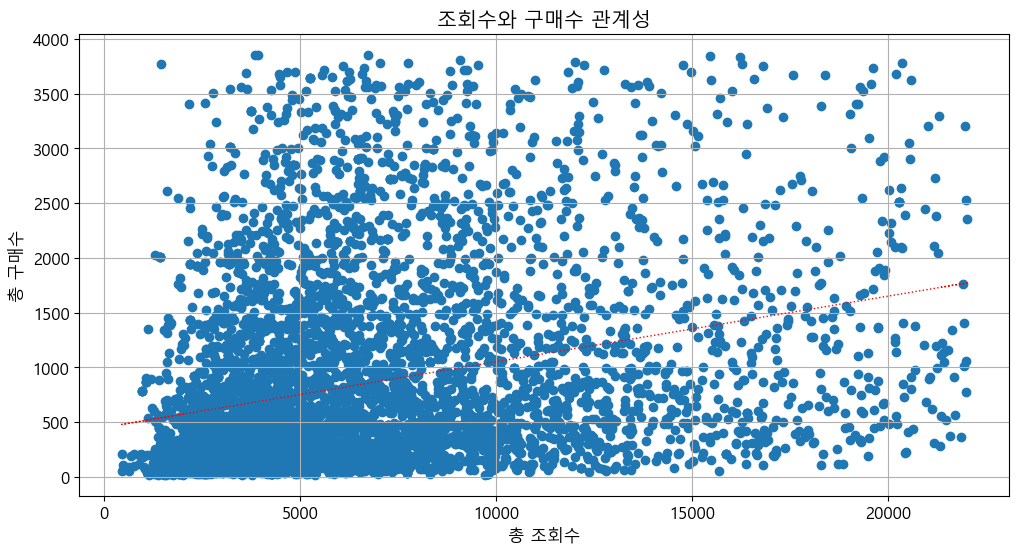

In [64]:
plt.figure()
plt.scatter(outline_buy['총 조회수'], outline_buy['총 구매수'])
plt.plot(x, y, color="#ff0000", linewidth=1, linestyle=":")
plt.title("조회수와 구매수 관계성")
plt.xlabel("총 조회수")
plt.ylabel("총 구매수")
plt.grid()
plt.show()
plt.close()

#### (3) 정리

조회수는 2000~5000회, 구매수는 0~500회 사이에 많이 밀집되어있고, 조회수가 올라갈수록 구매수가 증가한다.

### [4] 총평

상품의 가격대가 증가할수록 조회수는 감소하고, 구매수도 감소하는 경향을 보인다.  
반면, 특정 조회수 범위에서는 가격에 상관없이 구매수가 증가하는 양상을 확인할 수 있다.